In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [2]:
batch = 2

In [8]:
def score(group, domain, batch, n):
    if domain != 9: 
        file = f'results/results_{group}_{domain}_{batch}_{n}.csv'
    else:
        file = f'results/results_{group}_nulls_{n}.csv'
    if os.path.isfile(file):
        df = pd.read_csv(file)
        return df['score'].to_numpy()
    else:
        return None

In [4]:
def plot2d(data, ticks, labels, ylabel, xlabel):
    plt.style.use('classic')
    plt.figure(facecolor='white')
    ax = plt.subplot(111)
    colors = matplotlib.cm.get_cmap('Set1')
    
    for i in range(data.shape[0]):
        plt.plot(ticks, data[i], label=labels[i], linewidth=3, color=colors(i))
    
    #ax.legend(loc='lower right', bbox_to_anchor=(2, 2), ncol=len(labels), fancybox=True, shadow=True)
    ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0.1), ncol=1, fancybox=True, shadow=True)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylim(0, 1.05)
    plt.gca().xaxis.grid(True, linestyle='--')
    plt.gca().yaxis.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()

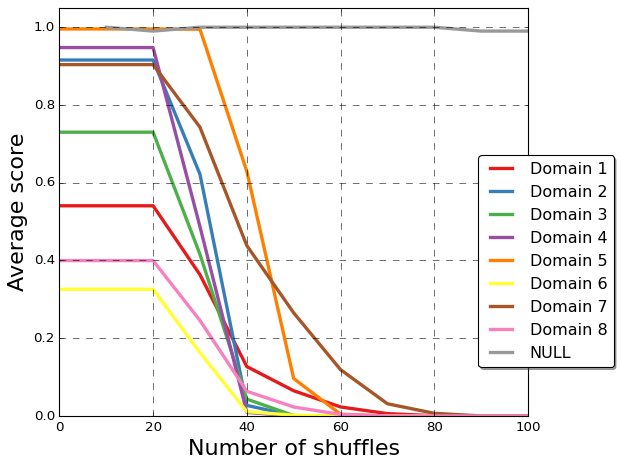

In [9]:
# Fix team, compare domains varying n
team = 2
domains = np.arange(9) + 1
ns = np.array(list(range(0, 110, 10)))

labels = ['Domain '+str(d) for d in domains[:-1]] + ['NULL']

scores = np.zeros((domains.shape[0], ns.shape[0]))
for i in range(domains.shape[0]):
    for j in range(ns.shape[0]):
        s = score(team, domains[i], batch, ns[j])
        if s is None:
            scores[i, j] = None
        else:
            scores[i, j] = s.mean()

plot2d(scores, ns, labels, ylabel='Average score', xlabel='Number of shuffles')

Domain 1


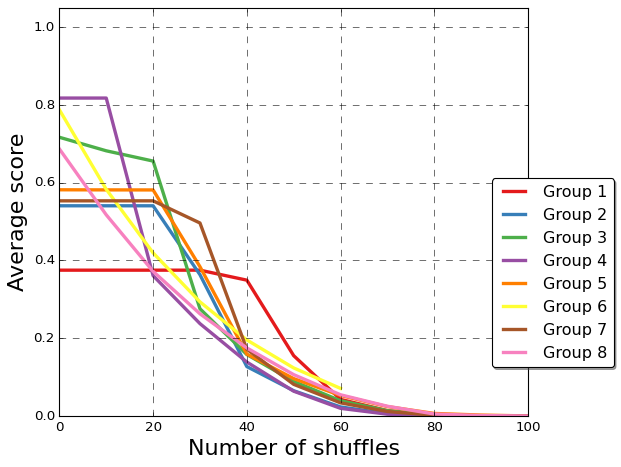

Domain 2


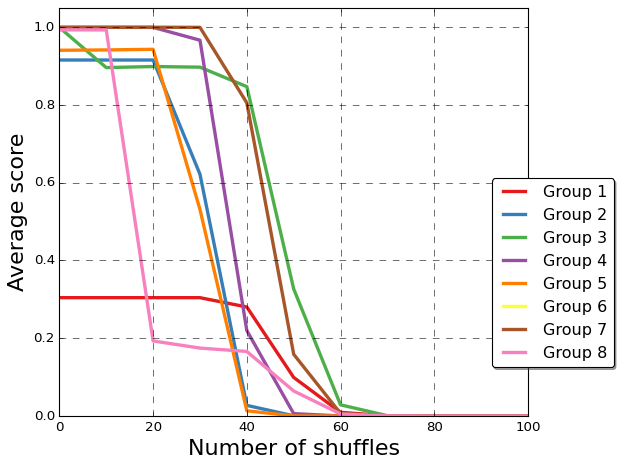

Domain 3


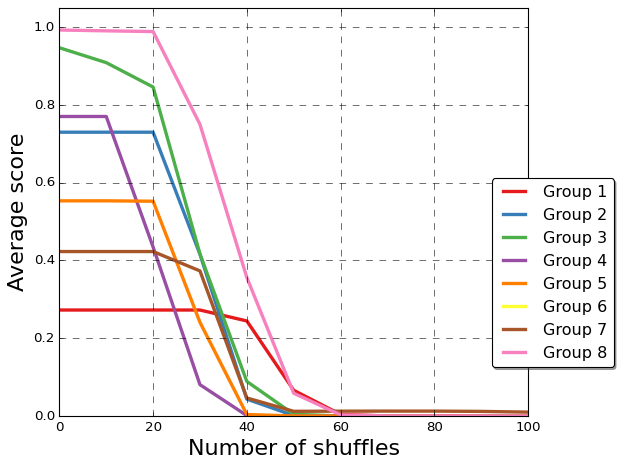

Domain 4


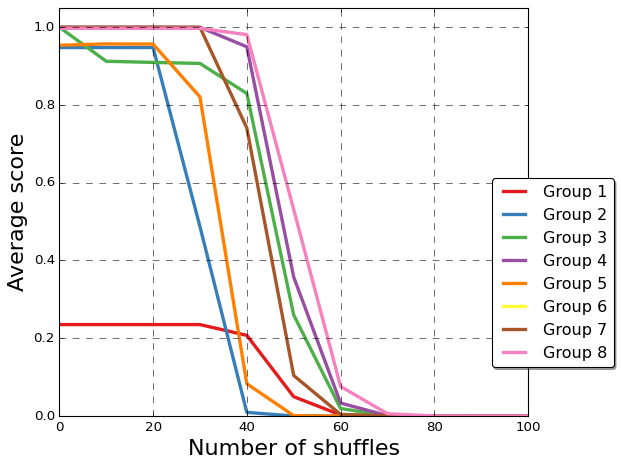

Domain 5


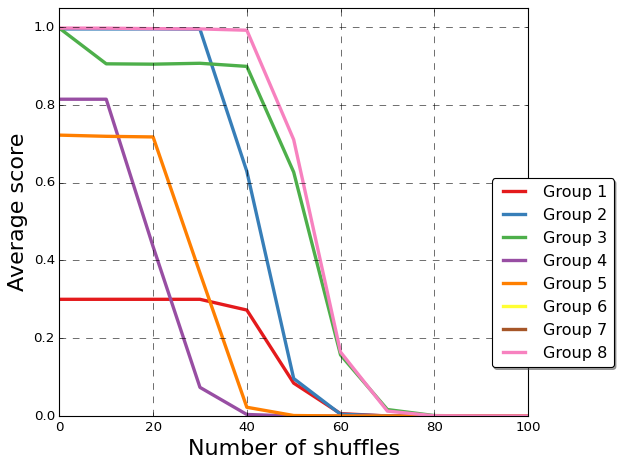

Domain 6


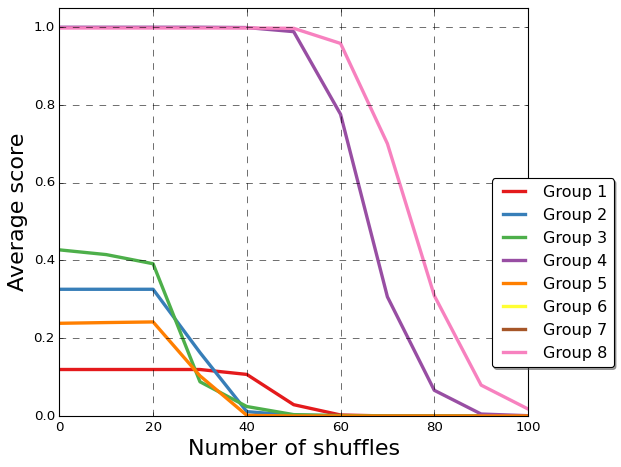

Domain 7


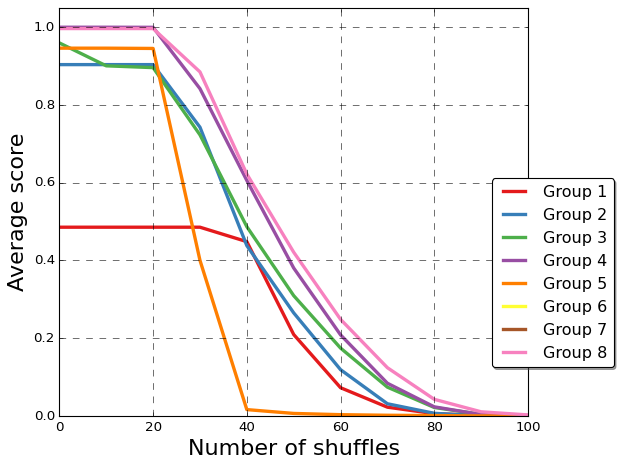

Domain 8


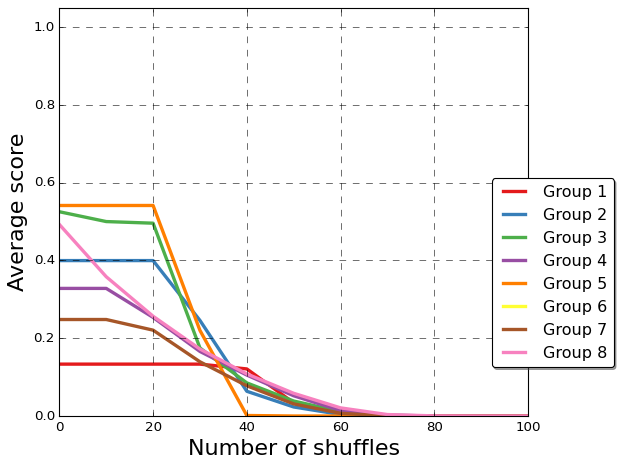

Domain 9


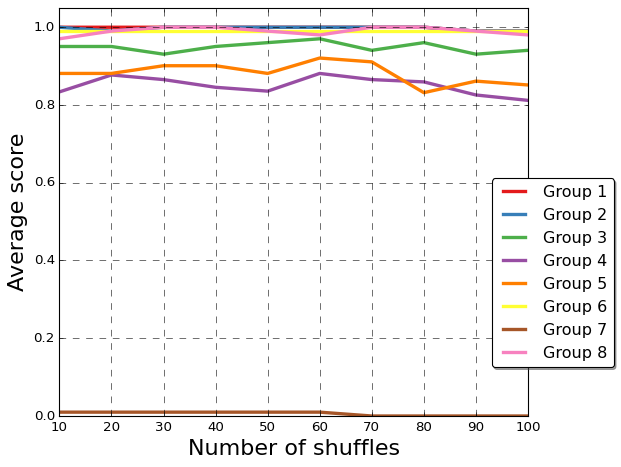

In [11]:
# Fix domain, compare groups across n

domains = np.arange(9) + 1
for domain in domains:
    groups = np.arange(8) + 1
    ns = np.array(list(range(0, 110, 10)))

    labels = ['Group '+str(g) for g in groups]


    scores = np.zeros((groups.shape[0], ns.shape[0]))
    for i in range(groups.shape[0]):
        for j in range(ns.shape[0]):
            s = score(groups[i], domain, batch, ns[j])
            if s is None:
                scores[i, j] = None
            else:
                scores[i, j] = s.mean()
    
    print(f'Domain {domain}')
    plot2d(scores, ns, labels, ylabel='Average score', xlabel='Number of shuffles')

Domain 1


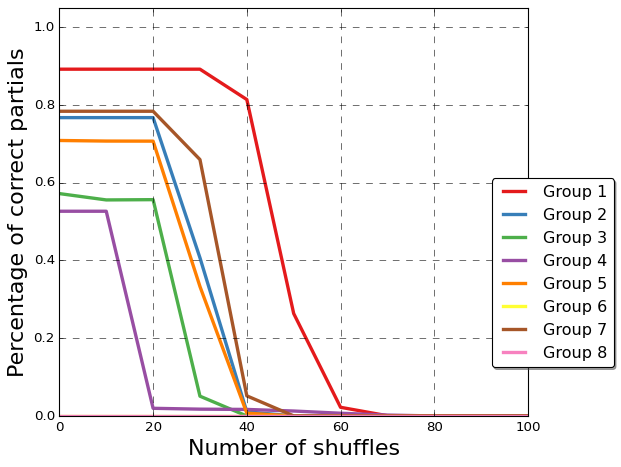

Domain 2


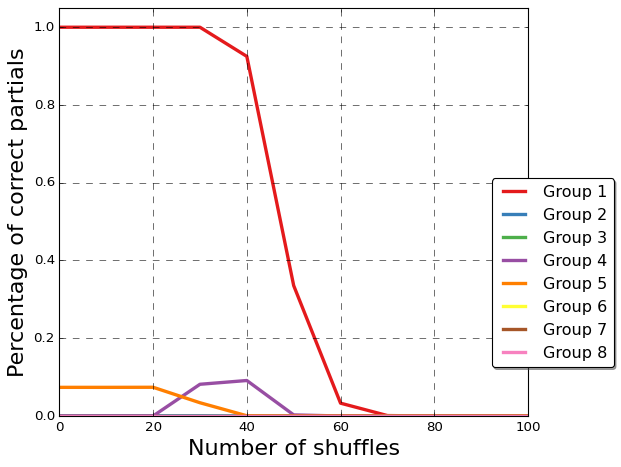

Domain 3


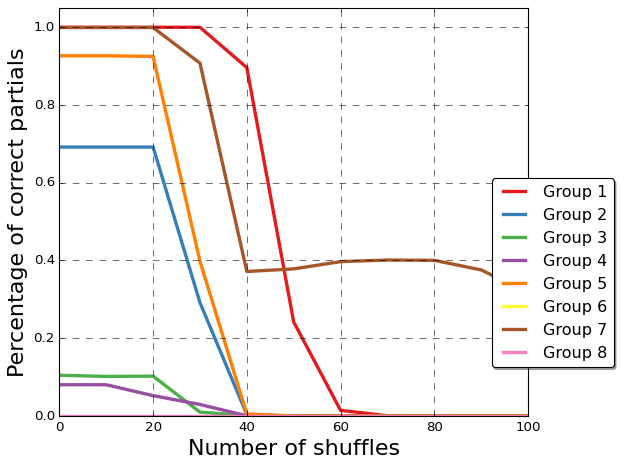

Domain 4


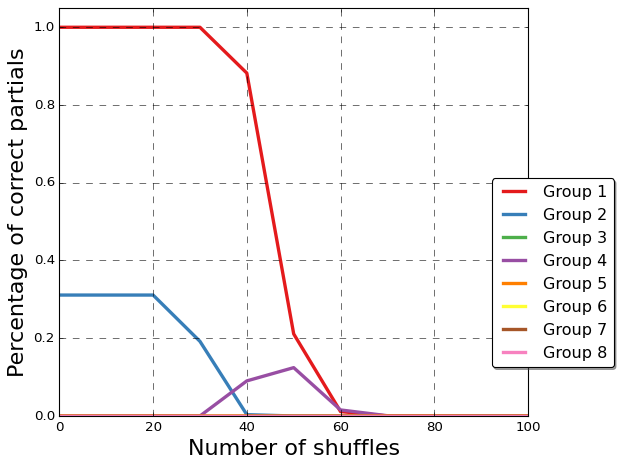

Domain 5


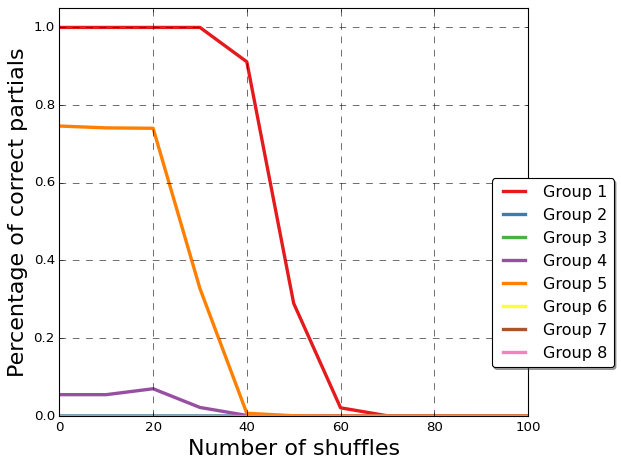

Domain 6


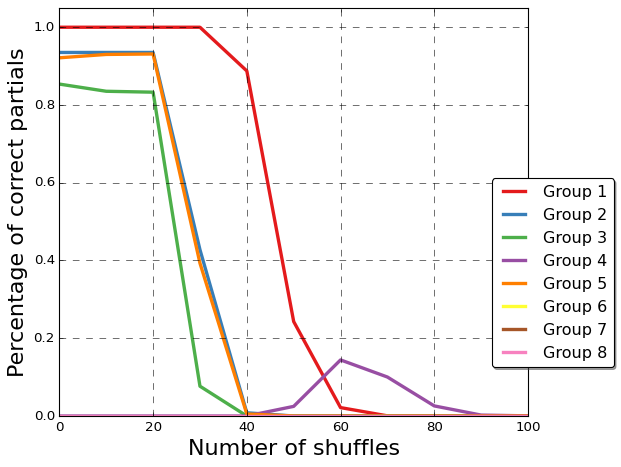

Domain 7


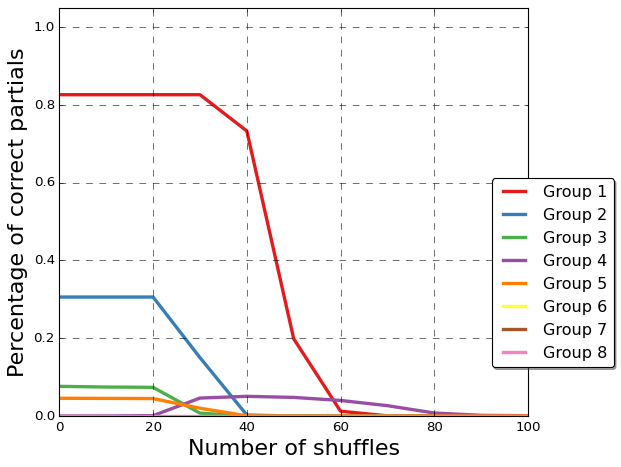

Domain 8


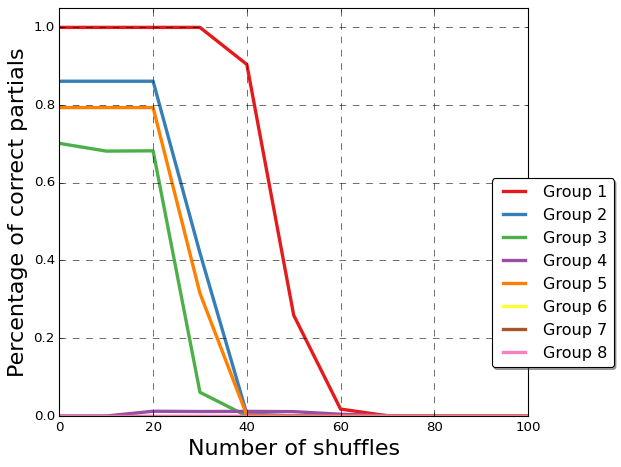

Domain 9


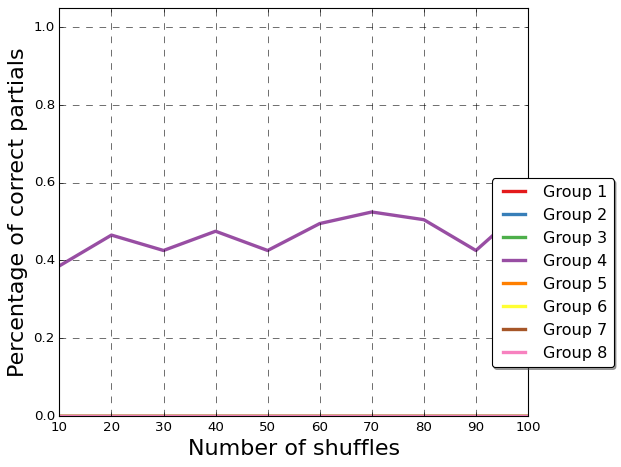

In [13]:
# partial percentage
domains = np.arange(9) + 1
for domain in domains:
    groups = np.arange(8) + 1
    ns = np.array(list(range(0, 110, 10)))

    labels = ['Group '+str(g) for g in groups]


    scores = np.zeros((groups.shape[0], ns.shape[0]))
    for i in range(groups.shape[0]):
        for j in range(ns.shape[0]):
            s = score(groups[i], domain, batch, ns[j])
            if s is None:
                scores[i, j] = None
            else:
                scores[i, j] = s[s*(1-s)>0].shape[0] / s.shape[0]
    
    print(f'Domain {domain}')
    plot2d(scores, ns, labels, ylabel='Percentage of correct partials', xlabel='Number of shuffles')